In [3]:
# подключение библиотек
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math as math
import seaborn as sns #
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px #
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS

## Importing Data

In [5]:
url = "/content/Sleep_Efficiency.csv"
df = pd.read_csv(url)
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. 
Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

Caffeine consumption:the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)

Alcohol consumption:the amount of alcohol consumed in the 24 hours prior to bedtime (in oz)

Exercise frequency:the number of times the test subject exercises each week

# 1.PIE 
Single column data 'categoric' (Smoking status)

In [6]:
df['Smoking status'].value_counts()

No     291
Yes    161
Name: Smoking status, dtype: int64

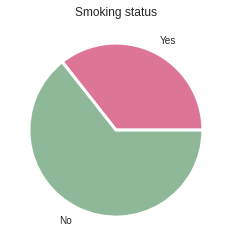

In [7]:
# Method 1
df['Smoking status']
# create data: an array of values
size_of_groups=df['Smoking status']
count = [0, 0]
for i in size_of_groups:
  if i == 'Yes':
    count[0]+=1
  else:
    count[1]+=1
# Create a pieplot
plt.pie(count, labels=['Yes', 'No'],colors=['#DD7596', '#8EB897'],labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Smoking status")
plt.show()

In [8]:
# Method 2 import plotly.express as px
fig = px.pie(df,names='Smoking status')
fig.show()

# 2.BARPLOT

In [12]:
df.Gender.value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

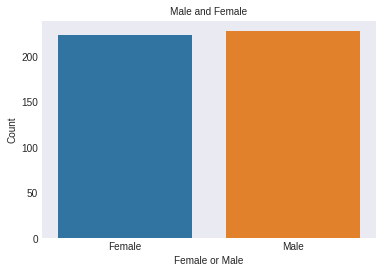

In [13]:
sns.countplot(data=df,x="Gender")
plt.xlabel("Female or Male",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Male and Female",fontsize=10)
plt.show()

# 3.HISTOGRAM

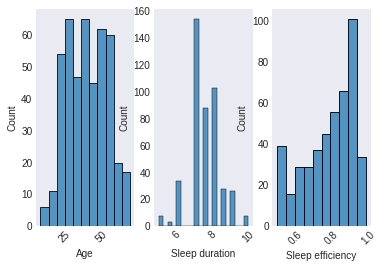

In [14]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=1, ncols=3)
axes=axes.ravel()

# Use the first subplot to plot histograms
first_columns=["Age", "Sleep duration", "Sleep efficiency"]
for i, column in enumerate(first_columns):
    sns.histplot(data=df, x=column,ax=axes[i])
    # rotate the x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

# 4.BOX PLOT
What is the effect of drinking alcohol on sleep efficiency?

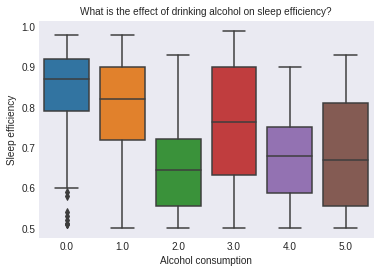

In [15]:
sns.boxplot(data=df,x="Alcohol consumption",y="Sleep efficiency")
plt.xlabel("Alcohol consumption",fontsize=10)
plt.ylabel("Sleep efficiency",fontsize=10)
plt.title("What is the effect of drinking alcohol on sleep efficiency?",fontsize=10)
plt.show()

Basically, the less alcohol you drink, the more efficient you are at sleeping.

# 5.VIOLIN PLOT



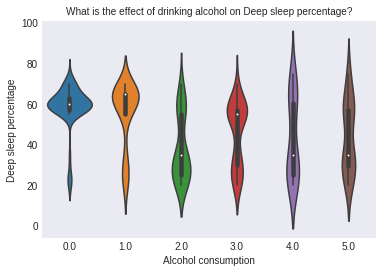

In [28]:
sns.violinplot(data=df,x="Alcohol consumption",y="Deep sleep percentage")
plt.xlabel("Alcohol consumption",fontsize=10)
plt.ylabel("Deep sleep percentage",fontsize=10)
plt.title("What is the effect of drinking alcohol on Deep sleep percentage?",fontsize=10)
plt.show()

Basically, the lower the alcohol consumption, the higher the percentage of deep sleep.

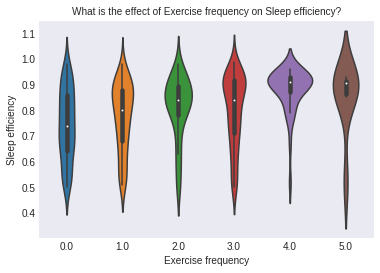

In [29]:
sns.violinplot(data=df,x="Exercise frequency",y="Sleep efficiency")
plt.xlabel("Exercise frequency",fontsize=10)
plt.ylabel("Sleep efficiency",fontsize=10)
plt.title("What is the effect of Exercise frequency on Sleep efficiency?",fontsize=10)
plt.show()

The more frequently you exercise during the week, the more efficient your sleep will be.

# 6.LINEPLOT
ONE CAT SEVERAL NUM, A NUM. IS ORDERED (Age)

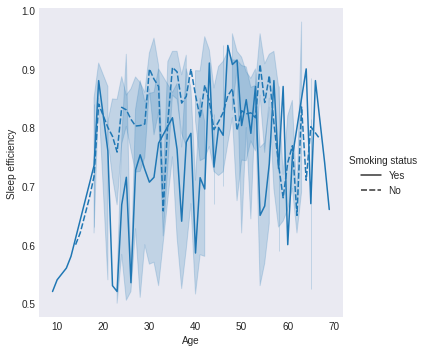

In [17]:
# Method 1
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep efficiency", style="Smoking status",
)
plt.show()

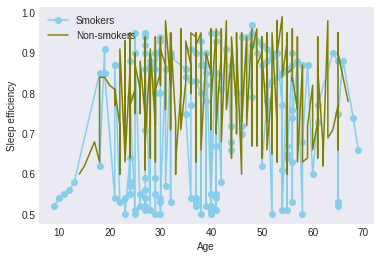

In [25]:
# Method 2
# Data
df1=df[['Smoking status','Age','Sleep efficiency']].copy()
df2=df1.sort_values(by=['Age'],ascending=True)

se_yes=list(df2[df2['Smoking status']=='Yes']['Sleep efficiency'])
se_no=list(df2[df2['Smoking status']=='No']['Sleep efficiency'])

age_yes=list(df2[df2['Smoking status']=='Yes']['Age'])
age_no=list(df2[df2['Smoking status']=='No']['Age'])

# multiple line plots
plt.plot(age_yes,se_yes,label="Smokers",marker='o',color='skyblue')
plt.plot(age_no,se_no,label="Non-smokers",marker='',color='olive')

# show legend
plt.legend()
plt.xlabel("Age")
plt.ylabel("Sleep efficiency")
# show graph
plt.show()

# 7.HEATMAP

In [23]:
# Drop the "ID" 'Bedtime','Wakeup time' column
dfnew = df.drop(labels=['ID','Bedtime','Wakeup time'], axis=1)
dfnew.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


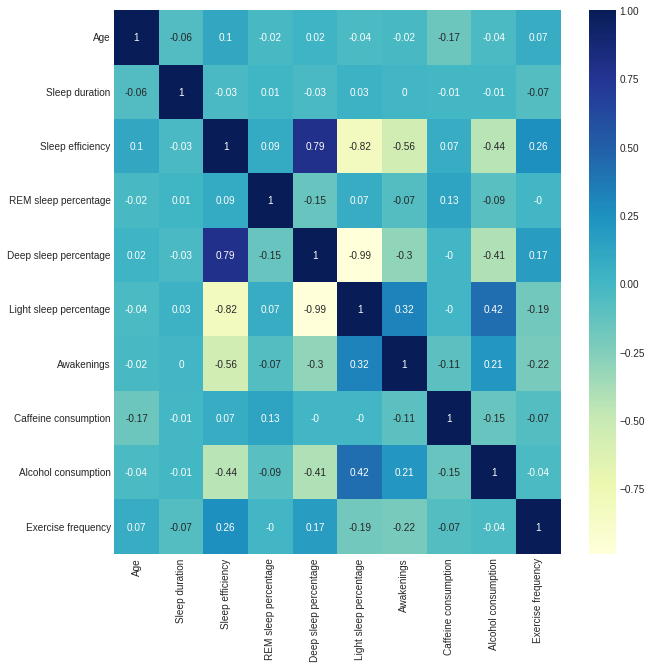

In [24]:
# plot the correlation matrix after cleaning
corr = dfnew.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), annot=True, cmap='YlGnBu')
plt.show()

'Sleep efficiency' and 'Deep sleep percentage' are significantly correlated